In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
df = pd.read_csv('train.csv')
df.tail()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.0,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.0,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.0,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.0,1,0.0,1.0,71173.03,0
165033,165033,15732798,Ulyanov,850,France,Male,31.0,1,0.0,1,1.0,0.0,61581.79,1


In [43]:
dfw = df.copy()
dfw.info()
dfw.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [44]:
dfw = dfw.drop(['Surname', 'id', 'CustomerId', 'HasCrCard', 'EstimatedSalary', 'Tenure', 'CreditScore'], axis=1)

In [45]:
dfw.head()

,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,France,Male,33.0,0.00,2,0.0,0
1,France,Male,33.0,0.00,2,1.0,0
2,France,Male,40.0,0.00,2,0.0,0
3,France,Male,34.0,148882.54,1,1.0,0
4,Spain,Male,33.0,0.00,2,1.0,0


In [46]:
dfw.describe()

,Age,Balance,NumOfProducts,IsActiveMember,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,38.125888,55478.086689,1.554455,0.497770,0.211599
std,8.867205,62817.663278,0.547154,0.499997,0.408443
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,0.000000,1.000000,0.000000,0.000000
50%,37.000000,0.000000,2.000000,0.000000,0.000000
75%,42.000000,119939.517500,2.000000,1.000000,0.000000
max,92.000000,250898.090000,4.000000,1.000000,1.000000


In [47]:
dfw_encoded = pd.get_dummies(dfw, columns=['Geography', 'Gender'])
dfw_encoded.head()

,Age,Balance,NumOfProducts,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,33.0,0.00,2,0.0,0,True,False,False,False,True
1,33.0,0.00,2,1.0,0,True,False,False,False,True
2,40.0,0.00,2,0.0,0,True,False,False,False,True
3,34.0,148882.54,1,1.0,0,True,False,False,False,True
4,33.0,0.00,2,1.0,0,False,False,True,False,True


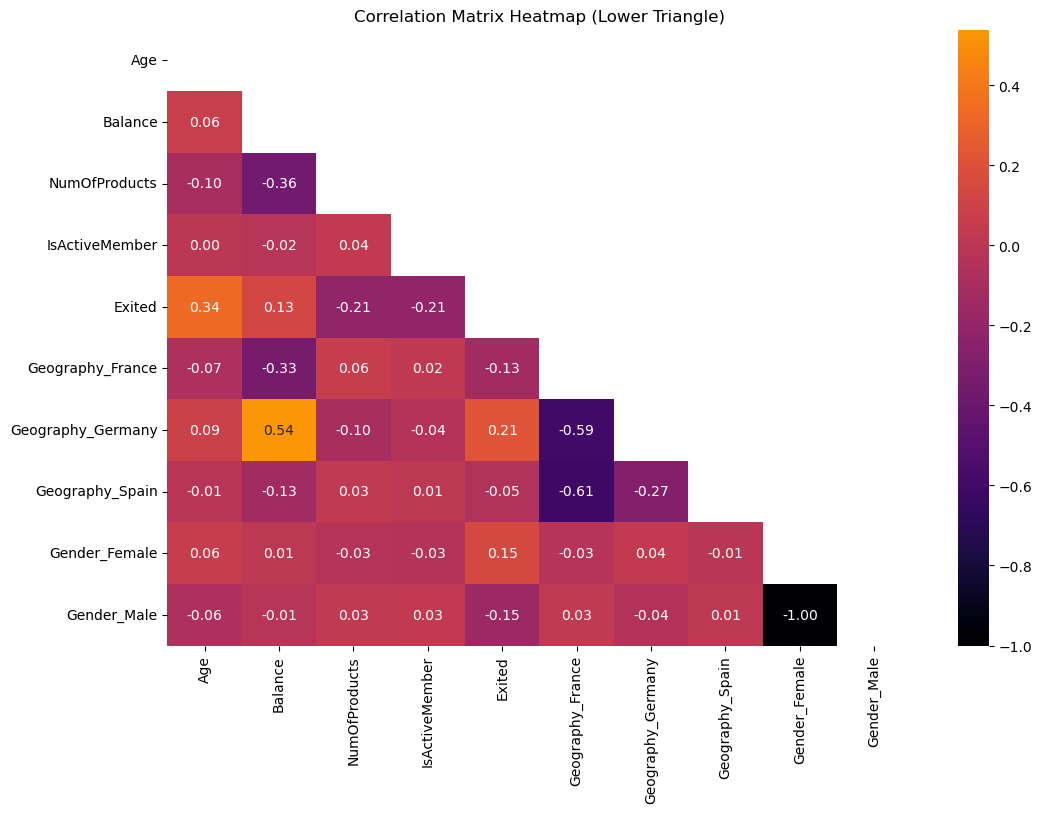

In [48]:
corr_matrix = dfw_encoded.corr()

# Setting figure size 
plt.figure(figsize=(12, 8))

# Creating a mask for the upepr triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Ploting the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='inferno', fmt=".2f", center=0)
plt.title("Correlation Matrix Heatmap (Lower Triangle)")
plt.show()

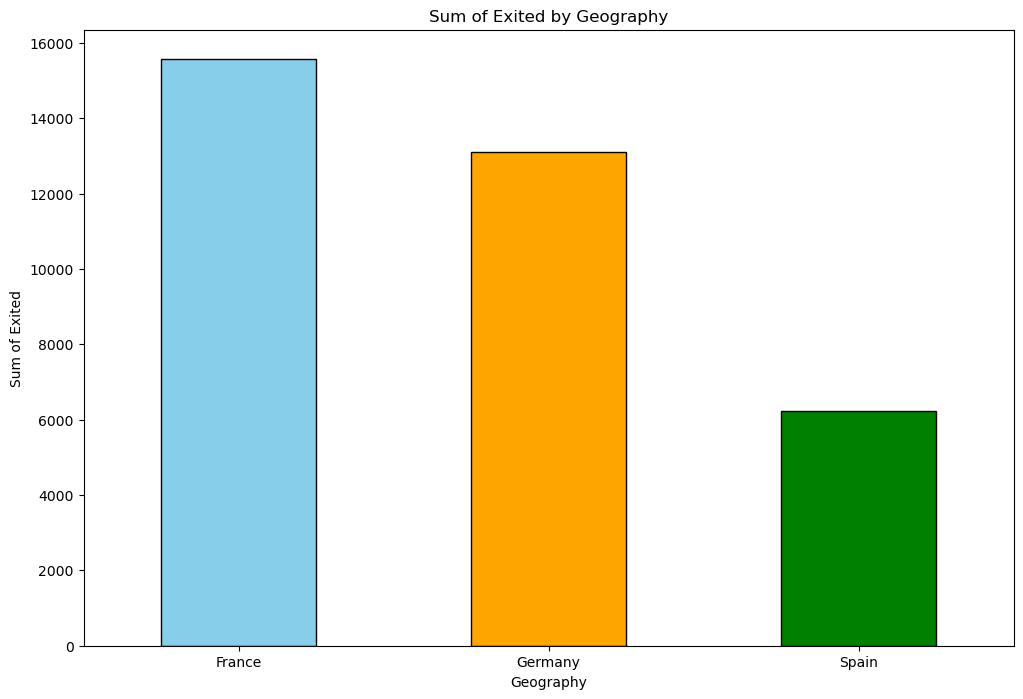

In [49]:
region_exited_sum = df.groupby('Geography')['Exited'].sum()
# Plot a bar chart
plt.figure(figsize=(12, 8))
region_exited_sum.plot(kind='bar', color=['skyblue', 'orange', 'green'], edgecolor='black')
plt.title('Sum of Exited by Geography')
plt.xlabel('Geography')
plt.ylabel('Sum of Exited')
plt.xticks(rotation=0)
plt.show()

In [79]:
# Balance varies immensely among samples so we wil scale it
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_prep = scaler.fit_transform(dfw_encoded[['Balance']])
dfw_encoded['Balance'] = df_prep
dfw_encoded['Balance']

0        -0.883163
1        -0.883163
2        -0.883163
3         1.486918
4        -0.883163
            ...   
165029   -0.883163
165030   -0.883163
165031   -0.883163
165032    1.688303
165033   -0.883163
Name: Balance, Length: 165034, dtype: float64

In [80]:
# Count the classes
class_counts = df['Exited'].value_counts()

# Display class counts
print(class_counts)

# Optionally calculate percentages
class_percentages = class_counts / len(df) * 100
class_percentages

Exited
0    130113
1     34921
Name: count, dtype: int64


Exited
0    78.840118
1    21.159882
Name: count, dtype: float64

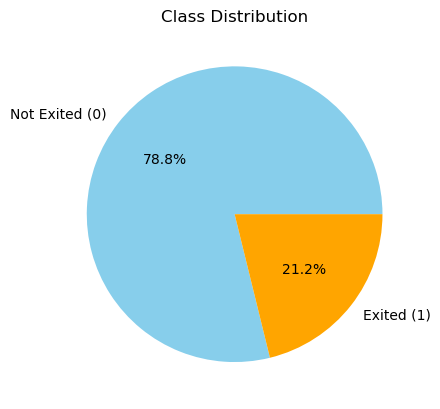

In [81]:
class_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Not Exited (0)', 'Exited (1)'], colors=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

In [82]:
# Adressing class imbalance

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = dfw_encoded.drop(columns='Exited')
y = dfw_encoded['Exited'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())

Class distribution after SMOTE:
Exited
0    104090
1    104090
Name: count, dtype: int64


In [83]:
X_train.head()

,Age,Balance,NumOfProducts,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
112149,35.0,-0.883163,2,1.0,True,False,False,True,False
70095,37.0,1.541380,2,0.0,True,False,False,True,False
29247,35.0,-0.883163,1,0.0,True,False,False,True,False
161355,32.0,-0.883163,2,0.0,True,False,False,True,False
105992,29.0,1.163218,1,1.0,True,False,False,False,True


### Model Selection

We will try 3 different models - logistic regression, Random forest and XGBoost

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

LR = LogisticRegression(max_iter=1000, random_state=24)

LR.fit(X_train_resampled, y_train_resampled)
cv_scores_LR = cross_val_score(LR, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores_LR)
print("Mean CV accuracy:", cv_scores_LR.mean())

Cross-validation scores: [0.74591699 0.75144106 0.75494764 0.75336247 0.75139303]
Mean CV accuracy: 0.7514122394082043


In [101]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet'],  # Type of regularization
    'solver': ['liblinear', 'saga'],  # Solvers that support L1 and elasticnet
    'max_iter': [100, 200, 500]
}

grid_search = GridSearchCV(LR, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model on the test data
test_accuracy = best_model.score(X_train_resampled, y_train_resampled)
print("Test Accuracy:", test_accuracy)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver =

Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy: 0.7513353828417716


In [95]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [104]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300],     
    'max_depth': [3, 6, 10],               
    'learning_rate': [0.01, 0.1],   
    'subsample': [0.6, 1.0],          
    'colsample_bytree': [0.6, 1.0]}    

grid_search_xgb = GridSearchCV(xgb, xgb_param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best CV Accuracy for XGBoost:", grid_search_xgb.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.6}
Best CV Accuracy for XGBoost: 0.8179364011912769


In [107]:
rf = RandomForestClassifier(random_state=42)

# rf_param_grid = {
    'n_estimators': [100, 300],        
    'max_depth': [None, 15, 30],       
    'min_samples_split': [3, 5, 10],       
    'min_samples_leaf': [1, 2, 4]          
}

# grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    scoring='roc_auc', 
    cv=5,
    verbose=2,
    n_jobs=-1            
)


print('RF score:', )
# grid_search_rf.fit(X_train_resampled, y_train_resampled)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best CV Accuracy for Random Forest:", grid_search_rf.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters for Random Forest: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


AttributeError: 'GridSearchCV' object has no attribute 'best_score'

Best Parameters for Random Forest: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.6}
Best Parameters for Logistic Regression: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

In [126]:
LR1 = LogisticRegression(C=100, max_iter=100, penalty='l2', solver='liblinear')
LR1.fit(X_train_resampled, y_train_resampled)

cv_scores_LR1 = cross_val_score(LR1, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc_ovo_weighted')
print("Cross-validation scores:", cv_scores_LR1)
print("Mean CV accuracy:", cv_scores_LR1.mean())

Cross-validation scores: [0.81682205 0.82414489 0.82813944 0.82775403 0.82345492]
Mean CV accuracy: 0.8240630660127041


In [127]:
XGB1 = XGBClassifier(colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.6, eval_metric='logloss')
XGB1.fit(X_train_resampled, y_train_resampled)

cv_scores_XGB1 = cross_val_score(XGB1, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc_ovo_weighted')
print("Cross-validation scores:", cv_scores_XGB1)
print("Mean CV accuracy:", cv_scores_XGB1.mean())

Cross-validation scores: [0.88929644 0.89931416 0.90330779 0.90334373 0.90334643]
Mean CV accuracy: 0.8997217092139118


In [128]:
RF1 = RandomForestClassifier(max_depth=15, min_samples_split=5, min_samples_leaf=1, n_estimators=300)
RF1.fit(X_train_resampled, y_train_resampled)

cv_scores_RF1 = cross_val_score(RF1, X_train_resampled, y_train_resampled, cv=5, scoring='roc_auc_ovo_weighted')
print("Cross-validation scores:", cv_scores_RF1)
print("Mean CV accuracy:", cv_scores_RF1.mean())

Cross-validation scores: [0.89275249 0.90271973 0.90629064 0.90554802 0.90595386]
Mean CV accuracy: 0.9026529482082711


In [149]:
smote_full = SMOTE(random_state=42)
X_full = dfw_encoded.drop(columns=['Exited'])
y_full = dfw_encoded['Exited']
X_full, y_full = smote_full.fit_resample(X_full, y_full)
X_full.shape, y_full.shape

((260226, 9), (260226,))

In [150]:
RF2 = RandomForestClassifier(max_depth=15, min_samples_split=5, min_samples_leaf=1, n_estimators=300)
RF2.fit(X_full, y_full)

cv_scores_RF2 = cross_val_score(RF2, X_full, y_full, cv=5, scoring='roc_auc_ovo_weighted')
print("Cross-validation scores:", cv_scores_RF2)
print("Mean CV accuracy:", cv_scores_RF2.mean())

Cross-validation scores: [0.89437566 0.89965637 0.90450679 0.90378183 0.90378124]
Mean CV accuracy: 0.901220376293902


In [129]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [136]:
df_test_prep = df_test.drop(columns=['Surname', 'id', 'CustomerId', 'HasCrCard', 'EstimatedSalary', 'Tenure', 'CreditScore'])
df_test_prep.head()

,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,France,Female,23.0,0.00,2,1.0
1,France,Female,46.0,0.00,1,0.0
2,France,Female,34.0,0.00,2,0.0
3,France,Male,36.0,0.00,1,0.0
4,Germany,Male,38.0,121263.62,1,0.0


In [137]:
df_test_prep_enc = pd.get_dummies(df_test_prep, columns=['Geography', 'Gender'])
df_test_prep_enc.head()

,Age,Balance,NumOfProducts,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,23.0,0.00,2,1.0,True,False,False,True,False
1,46.0,0.00,1,0.0,True,False,False,True,False
2,34.0,0.00,2,0.0,True,False,False,True,False
3,36.0,0.00,1,0.0,True,False,False,False,True
4,38.0,121263.62,1,0.0,False,True,False,False,True


In [140]:
df_test_prep_enc_scaled = scaler.fit_transform(df_test_prep_enc[['Balance']])
df_test_prep_enc['Balance'] = df_test_prep_enc_scaled
df_test_prep_enc.head()

,Age,Balance,NumOfProducts,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,23.0,-0.881274,2,1.0,True,False,False,True,False
1,46.0,-0.881274,1,0.0,True,False,False,True,False
2,34.0,-0.881274,2,0.0,True,False,False,True,False
3,36.0,-0.881274,1,0.0,True,False,False,False,True
4,38.0,1.050038,1,0.0,False,True,False,False,True


In [152]:
rf_probabilities = RF2.predict_proba(df_test_prep_enc)

# Extract the probability of class 1 (Exited=1)
rf_prob_exited = rf_probabilities[:, 1]

# Display the first few probabilities
print("Random Forest Probabilities (Exited=1):", rf_prob_exited[:5])

Random Forest Probabilities (Exited=1): [0.03092101 0.96275046 0.10521392 0.65943738 0.68450149]


In [167]:
submission = pd.DataFrame({
    'id': df_test['id'],
    'Exited': rf_prob_exited})

submission.to_csv('submission.csv', index=False)

In [170]:
submission.head()

,id,Exited
0,165034,0.030921
1,165035,0.962750
2,165036,0.105214
3,165037,0.659437
4,165038,0.684501
